### Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv("diabetes-2.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
### Checking for missing values
df.isnull().values.any()

False

##### Meta Data

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Since some columns have a minimum value of 0 which is not logica, those are essentially missing values in our dataset.

In [6]:
#listing columns with missing values(0)
missing_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [7]:
def show_zero(col_name):
    print('%s: %d'%(col_name, df[df[col_name]==0].shape[0])) #Identifying the number of '0' values

In [8]:
#loopig through each name in missing_col and calling the function
for col_name in missing_col:
    show_zero(col_name)

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [9]:
# Replacing these zero values with NAN
df[missing_col] = df[missing_col].replace(0, np.NaN)

Replacing the missing values with mean values

In [10]:
for i in missing_col:
    df[i].fillna(value=np.mean(df[i]), inplace=True)

In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Checking if data has outliers using box plot

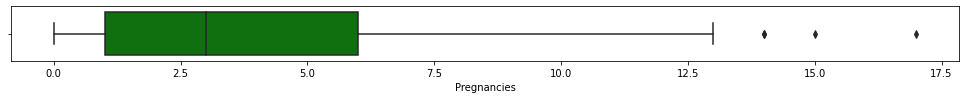

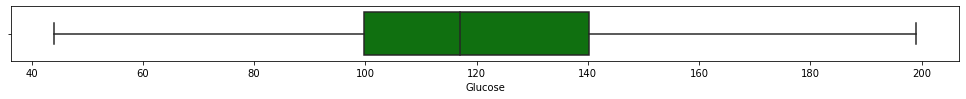

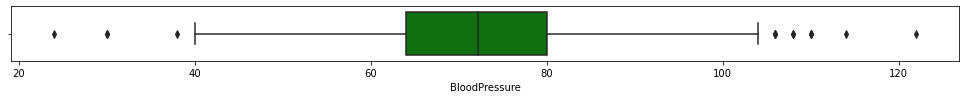

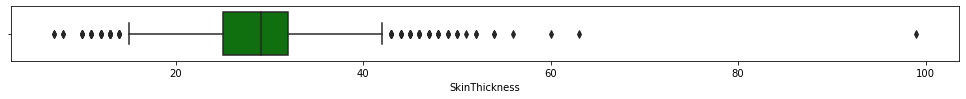

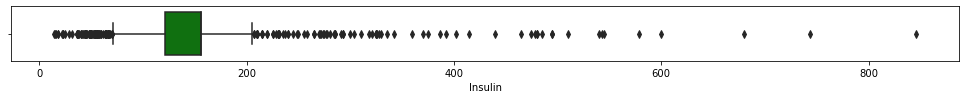

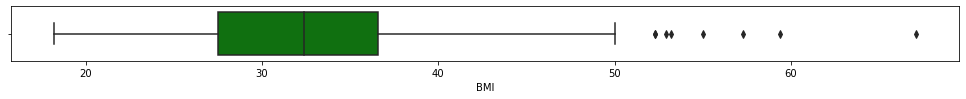

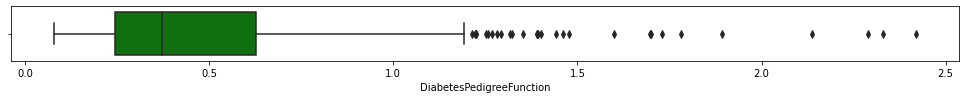

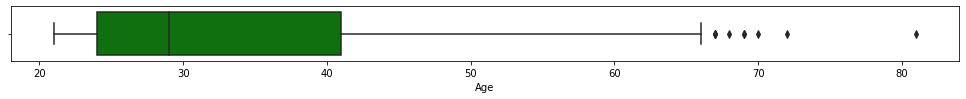

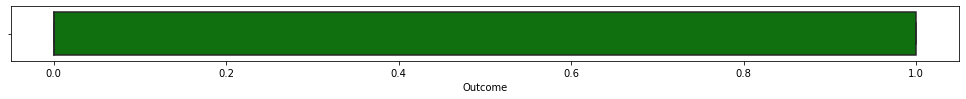

In [12]:
for column in df:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df, x=column, color="green")

#### removing outliers

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape

(515, 9)

#### Now let's look at some characteristics of our data

In [14]:
#number of patients in each outcome
outcome= df_clean['Outcome'].value_counts()
outcome

0    336
1    179
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Patient Outcome', ylabel='Frequency'>

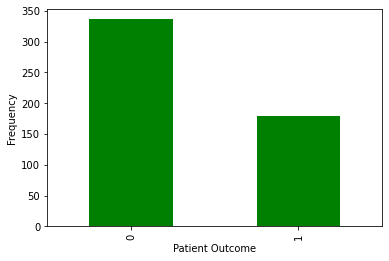

In [15]:
# visaualising the above outcome
outcome.plot.bar(color="green", xlabel= 'Patient Outcome', ylabel='Frequency')

#### Correlation Matrix

In [16]:
correlation = df_clean.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.110622,0.201698,0.129082,0.119618,0.028829,0.014969,0.513640,0.187868
Glucose,0.110622,1.000000,0.214924,0.069066,0.180899,0.152330,0.068436,0.266073,0.478218
BloodPressure,0.201698,0.214924,1.000000,0.128661,0.107820,0.229477,0.025405,0.352452,0.162221
SkinThickness,0.129082,0.069066,0.128661,1.000000,0.125630,0.415246,0.051262,0.074935,0.151155
Insulin,0.119618,0.180899,0.107820,0.125630,1.000000,0.029492,-0.032920,0.193573,0.140253
BMI,0.028829,0.152330,0.229477,0.415246,0.029492,1.000000,0.138813,0.013666,0.267172
DiabetesPedigreeFunction,0.014969,0.068436,0.025405,0.051262,-0.032920,0.138813,1.000000,0.021202,0.182401
Age,0.513640,0.266073,0.352452,0.074935,0.193573,0.013666,0.021202,1.000000,0.228587
Outcome,0.187868,0.478218,0.162221,0.151155,0.140253,0.267172,0.182401,0.228587,1.000000


<AxesSubplot:>

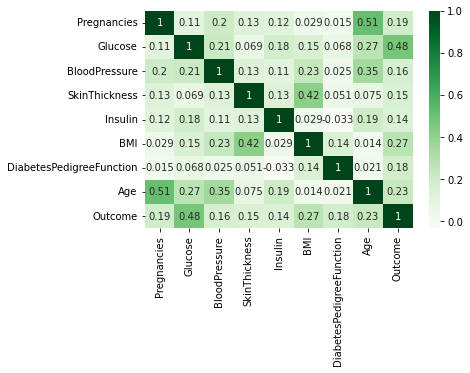

In [17]:
sns.heatmap(correlation, cmap="Greens", annot=True)

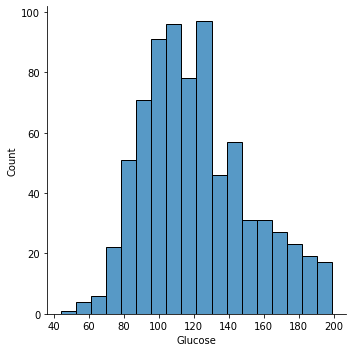

In [18]:
sns.displot(df['Glucose'])

Investigating the distribution of diabetics/nondiabetics across age variable

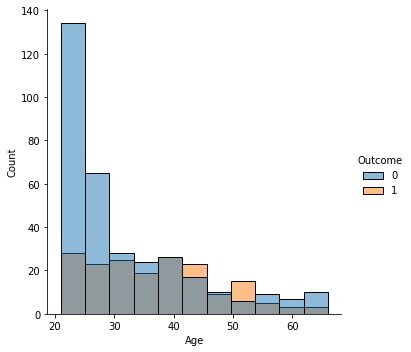

In [19]:
plot = sns.displot(df_clean, x="Age", hue="Outcome")
plt.show()

#### Splitting X and y columns

In [20]:
X = df_clean.iloc[:, :-1]
y = df_clean.iloc[:, -1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


#### Splitting Train and Test data

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

#### data Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

## Models

### Logistic Regression Model

Training Set

In [23]:
from sklearn.linear_model import LogisticRegression
classifier_log= LogisticRegression()
classifier_log.fit(X_train, y_train)

LogisticRegression()

Predicting test set results

In [24]:

ylog_pred = classifier_log.predict(X_test)

Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_log= confusion_matrix(y_test, ylog_pred)
print(cm_log)


[[65 11]
 [10 17]]


Computing accuracy

In [26]:
log_accuracy= accuracy_score(y_test, ylog_pred)
log_accuracy

0.7961165048543689

In [27]:
# Computing classification report
from sklearn.metrics import classification_report
report_log = classification_report(y_test, ylog_pred, output_dict=True)
data_log = pd.DataFrame(report_log).transpose()
data_log

,precision,recall,f1-score,support
0,0.866667,0.855263,0.860927,76.000000
1,0.607143,0.629630,0.618182,27.000000
accuracy,0.796117,0.796117,0.796117,0.796117
macro avg,0.736905,0.742446,0.739554,103.000000
weighted avg,0.798636,0.796117,0.797295,103.000000


### Support Vector Machine

In [28]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear')
classifier_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
#redicting test data
ysvc_pred= classifier_svc.predict(X_test)

In [30]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svc= confusion_matrix(y_test, ysvc_pred)
cm_svc

array([[66, 10],
       [11, 16]])

In [31]:
svc_accuracy= accuracy_score(y_test, ysvc_pred)
svc_accuracy

0.7961165048543689

In [32]:
from sklearn.metrics import classification_report
report_svc = classification_report(y_test, ysvc_pred, output_dict=True)
data_svc = pd.DataFrame(report_svc).transpose()
data_svc

,precision,recall,f1-score,support
0,0.857143,0.868421,0.862745,76.000000
1,0.615385,0.592593,0.603774,27.000000
accuracy,0.796117,0.796117,0.796117,0.796117
macro avg,0.736264,0.730507,0.733259,103.000000
weighted avg,0.793769,0.796117,0.794859,103.000000


### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier_dec = DecisionTreeClassifier(max_depth=5)
classifier_dec.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [34]:
#predicting test data
ydec_pred= classifier_dec.predict(X_test)

In [35]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm_dec= confusion_matrix(y_test, ydec_pred)
cm_dec

array([[58, 18],
       [10, 17]])

In [36]:
dec_accuracy= accuracy_score(y_test, ydec_pred)
dec_accuracy

0.7281553398058253

In [37]:
from sklearn.metrics import classification_report
report_dec = classification_report(y_test, ydec_pred, output_dict=True)
data_dec = pd.DataFrame(report_dec).transpose()
data_dec

,precision,recall,f1-score,support
0,0.852941,0.763158,0.805556,76.000000
1,0.485714,0.629630,0.548387,27.000000
accuracy,0.728155,0.728155,0.728155,0.728155
macro avg,0.669328,0.696394,0.676971,103.000000
weighted avg,0.756678,0.728155,0.738142,103.000000


### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
#predicting test data
yknn_pred= classifier_knn.predict(X_test)

In [40]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, yknn_pred)
cm

array([[61, 15],
       [11, 16]])

In [41]:
knn_accuracy= accuracy_score(y_test, yknn_pred)
knn_accuracy

0.7475728155339806

In [42]:
# creating classification table
from sklearn.metrics import classification_report
report_knn = classification_report(y_test, yknn_pred, output_dict=True)
data_knn = pd.DataFrame(report_knn).transpose()
data_knn

,precision,recall,f1-score,support
0,0.847222,0.802632,0.824324,76.000000
1,0.516129,0.592593,0.551724,27.000000
accuracy,0.747573,0.747573,0.747573,0.747573
macro avg,0.681676,0.697612,0.688024,103.000000
weighted avg,0.760431,0.747573,0.752866,103.000000


### Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier_rand = RandomForestClassifier(n_estimators = 10, random_state = 42)
classifier_rand.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [44]:
#predicting test data
yrand_pred= classifier_rand.predict(X_test)

In [45]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm_rand= confusion_matrix(y_test, yrand_pred)
cm_rand

array([[65, 11],
       [ 9, 18]])

In [46]:
# Checking Accuracy score
rand_accuracy= accuracy_score(y_test, yrand_pred)
rand_accuracy

0.8058252427184466

In [47]:
# creating classification table
from sklearn.metrics import classification_report
report_rand = classification_report(y_test, yrand_pred, output_dict=True)
data_rand = pd.DataFrame(report_rand).transpose()
data_rand

,precision,recall,f1-score,support
0,0.878378,0.855263,0.866667,76.000000
1,0.620690,0.666667,0.642857,27.000000
accuracy,0.805825,0.805825,0.805825,0.805825
macro avg,0.749534,0.760965,0.754762,103.000000
weighted avg,0.810829,0.805825,0.807998,103.000000


#### Visualisng each model accuracy

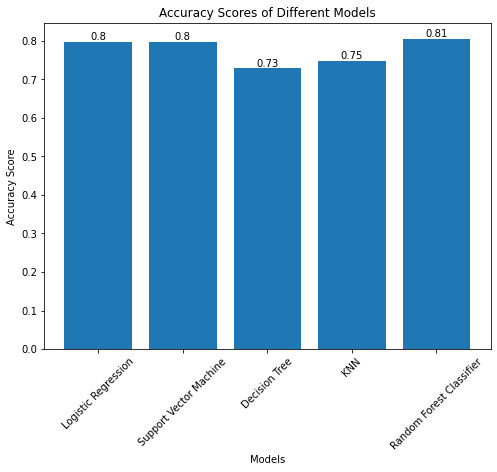

In [48]:
# Creating bar graphs
plt.figure(figsize=(8, 6)) # set the figure size
bars = plt.bar(['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'KNN', 'Random Forest Classifier'], 
        [log_accuracy, svc_accuracy, dec_accuracy, knn_accuracy, rand_accuracy])

# Add labels and title to the graph
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')

plt.xticks(rotation=45)

# Adding the accuracy scores on top of each bar
for bar, score in zip(bars, [log_accuracy, svc_accuracy, dec_accuracy, knn_accuracy, rand_accuracy]):
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), round(score, 2), ha='center', va='bottom')

# Show the graph
plt.show()
